# Test area for diffusion modelling.


### Notes from Lecture videos

Definition of a derivative
$$ \left. \frac{df(x)}{dx} \right|_{x=0} = f'(a)=\lim_{x \to 0}\frac{f(x)-f(a)}{x-a} $$

Forward difference:
$$ \left. \frac{df(x)}{dx} \right|_{x_i} \approx \frac{f(x_{i+1})-f(x_i)}{x_{i+1}-x_i} $$

Backward difference:
$$ \left. \frac{df(x)}{dx} \right|_{x_i} \approx \frac{f(x_i)-f(x_{i-1})}{x_i-x_{i-1}} $$

Central difference:
$$ \left. \frac{df(x)}{dx} \right|_{x_i} \approx \frac{f(x_{i+1})-f(x_{i-1})}{x_{i+1}-x_{i-1}} $$

### Taylor series

* Assume all nodes/points are equally spaced i.e. h is constant

$$ f(x_{i+1}) = f(x_i) + hf'(x_i) + \frac{1}{2!}h^2f''(x_i) + \frac{1}{3!}h^3f'''(x_i) + \frac{1}{4!}h^4f''''(x_i) + ... $$

$$ f(x_{i+1}) = f(x_i) + hf'(x_i) + \frac{1}{2!}h^2f''(x_i) + ... + \left. \frac{1}{n!}h^n \frac{d^nf}{x^n} \right|_{x_i} + R_n \xi $$

where $\xi$ is an unknown location between $x_i \ge \xi \ge x_{i+1}$ and we cannot calculate $\xi$.


Using the first 2 terms of the Taylor's Series for $f(x_{i+1})$

$$ f(x_{i+1}) = f(x_i) + hf'(x_i) + \frac{1}{2!}h^2f''(\xi) $$

Solve for $f'(x_{i+1})$:
$$ f'(x_{i+1}) = \frac{f(x_{i+1})-f(x_i)}{h} - \frac{1}{2!}hf''(\xi) = \frac{f(x_{i+1})-f(x_i)}{h} - error $$

Note: As the value of $h$ gets smaller the $error$ is smaller:
$$ error = \frac{f''(\xi)}{2}h $$
This is also a __first order__ method (order of h given to the truncation error)

## General 1D diffusion problem
Diffusion type systems have a general form of:
$$
    \frac{\delta u}{\delta t} = \alpha \frac{\delta^2 u}{\delta x^2} + f
$$

The forward Euler model [^1], the space domain is defined with the following nodes:
$$
    x_i = i\Delta x, i = 0,...,N_x
$$
and the time domain is defines as:
$$
    t_n = n \Delta t, n = 0,...,N_t
$$

So, considering the general diffusion system notes above, $u(x_i, t_n)$ can be denoted as $u^n_i$. Thus, the general diffusion system becomes:
$$
    \frac{\delta}{\delta t}u(x_i, t_n) = \alpha \frac{\delta^2}{\delta x^2} u(x_i, t_n)
$$

The solution to a 2^nd order finite difference approximation can be derived by combining 2 Taylor series, this results in a forward difference in time and a central difference in space:
$$
    \frac{u_i^{n+1} - u_i^n}{\Delta t} = \alpha \frac{u_{i+1}^n - 2u_i^n +u_{i-1}^n}{\delta x^2} + Err_{trunc}(dx^2)
$$

Where the truncation error ($Err_{trunc}$) can be seen to be 2^nd order. Rearranging this with respect to the unknown $u_i^{n+1}$:
$$
    u_i^{n+1} = u_i^n + F(u_{i+1}^n - 2u_i^n + u_{i-1}^n) +\Delta t.Err_{trunc}(dx^2)
$$
where:
$$
    F = \alpha \frac{\Delta t}{\Delta x^2}
$$

> [!Note]
> F is the __Fourier Number__, a dimensionless value that represents the physical parameters of the diffusion problem in $\alpha$ and the discretised parameters $\Delta x$ and $\Delta t$.

[^1]: Finite difference methods for diffusion processes. H. P. Langtangen, S. Linge. 2016 July 14

## General 2D diffusion problem
Diffusion type systems in 2D have a general form of:
$$
    \frac{\delta u}{\delta t} = \alpha (\frac{\delta^2 u}{\delta x^2} + \frac{\delta^2 u}{\delta y^2}) 
$$
For the 2D problem we add another dimension:
$$
    y_j = j\Delta y, j = 0,...,N_y
$$
So our 2D diffusion system, $u(x_i, y_j, t_n)$ can be denoted as $u^n_{i,j}$, thus:
$$
    u_i^{n+1} = u_{i,j}^n + F_x(u_{i+1,j}^n - 2u_{i,j}^n + u_{i-1,j}^n) + F_y(u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n)
$$
where:
$$
    F_x = \alpha \frac{\Delta t}{\Delta x^2}, F_y = \alpha \frac{\Delta t}{\Delta y^2}
$$
If we assume $\Delta x = \Delta y$, the 2D solution can be simplified to:
$$
    u_i^{n+1} = u_{i,j}^n + F(u_{i+1,j}^n + u_{i-1,j}^n + u_{i,j+1}^n + u_{i,j-1}^n - 4u_{i,j}^n) 
$$
where:
$$
    F = \alpha \frac{\Delta t}{\Delta x^2}
$$

## Stability
Add notes
$$
    \Delta t \leq \frac{\Delta x^2}{2\alpha}
$$

In [ ]:
""""
Function for solving diffusion system in 2D using finite difference method.
"""
import numpy as np

def solve_diffusion_2d(nx, ny, dx, dy, dt, nt, alpha, u0):
    """
    Solve the 2D diffusion equation using finite difference method.

    Parameters:
    nx : int
        Number of grid points in x direction.
    ny : int
        Number of grid points in y direction.
    dx : float
        Grid spacing in x direction.
    dy : float
        Grid spacing in y direction.
    dt : float
        Time step size.
    nt : int
        Number of time steps to simulate.
    alpha : float
        Diffusion coefficient.
    u0 : 2D array
        Initial condition for the diffusion equation.

    Returns:
    u : 2D array
        Solution after nt time steps.
    """
    # Check stability condition
    if dt > (dx**2 * dy**2) / (2 * alpha * (dx**2 + dy**2)):
        dt_max = (dx**2 * dy**2) / (2 * alpha * (dx**2 + dy**2))
        alpha_max = (dx**2 * dy**2) / (2 * dt * (dx**2 + dy**2))
        raise ValueError("Time step size dt is too large for stability. Maximum dt: ", dt_max, " or reduce alpha to: ", alpha_max)
    
    u = np.zeros((nt, nx, ny))  # Initialize the solution array
    u[0, :, :] = u0  # Set initial condition
    for n in range(1, nt):
        u[n, 0, :] = u0[0, :]  # Left boundary
        u[n, -1, :] = u0[-1, :]  # Right boundary
        u[n, :, 0] = u0[:, 0]  # Bottom boundary
        u[n, :, -1] = u0[:, -1]  # Top boundary  
        for i in range(1, nx-1):  # Boundary conditions are at i = 0 and i = nx. Default is 0.
            for j in range(1, ny-1):
                u[n, i, j] = (u[n-1, i, j] + 
                               alpha * dt * ((u[n-1, i+1, j] - 2*u[n-1, i, j] + u[n-1, i-1, j]) / dx**2 +
                                              (u[n-1, i, j+1] - 2*u[n-1, i, j] + u[n-1, i, j-1]) / dy**2))
    return u

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time as time
from IPython.display import HTML
import numpy as np

initial_condition = np.zeros((50, 50))
initial_condition[25, 25] = 100.0  # Point source in the center
initial_condition[0:1, :] = 100  # Top boundary
initial_condition[-1, :] = 100.0  # Bottom boundary
initial_condition[:, 0] = 100.0  # Left boundary
initial_condition[:, -1] = 100.0  # Right boundary

start_time = time.time()
test = solve_diffusion_2d(50, 50, 1.0, 1.0, 0.1, 300, 2.5, initial_condition)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time for solution: {elapsed_time:.2f} seconds")

fig, ax = plt.subplots()
images = []
for i in range(test.shape[0]):
    img = ax.imshow(test[i], cmap='hot', vmin=0, vmax=100, animated=True)
    images.append([img])
ani = animation.ArtistAnimation(fig, images, interval=50, blit=True, repeat_delay=1000)

HTML(ani.to_jshtml())

In [34]:
""""
Function for solving diffusion system in 2D using finite difference method.

This function has the addition of:
 - Variable alpha values for diffusion coefficient
"""
import numpy as np

def solve_diffusion_2d_vAlpha(nx, ny, dx, dy, dt, nt, alpha, u0):
    """
    Solve the 2D diffusion equation using finite difference method.

    Parameters:
    nx : int
        Number of grid points in x direction.
    ny : int
        Number of grid points in y direction.
    dx : float
        Grid spacing in x direction.
    dy : float
        Grid spacing in y direction.
    dt : float
        Time step size.
    nt : int
        Number of time steps to simulate.
    alpha : 2D array
        Diffusion coefficient.
    u0 : 2D array
        Initial condition for the diffusion equation.

    Returns:
    u : 3D array (t, x, y)
        All solutions from t = 0 to nt time steps.
    """
    # Check stability condition - using max alpha for worst case
    if dt > (dx**2 * dy**2) / (2 * alpha.max() * (dx**2 + dy**2)):
        dt_max = (dx**2 * dy**2) / (2 * alpha.max() * (dx**2 + dy**2))
        alpha_max = (dx**2 * dy**2) / (2 * dt * (dx**2 + dy**2))
        raise ValueError("Time step size dt is too large for stability. Maximum dt: ", dt_max, " or reduce alpha to: ", alpha_max)
    
    u = np.zeros((nt, nx, ny))  # Initialize the solution array
    u[0, :, :] = u0  # Set initial condition
    for n in range(1, nt):
        # Reset boundary conditions at each time step
        u[n, 0, :] = u0[0, :]       # Left boundary
        u[n, -1, :] = u0[-1, :]     # Right boundary
        u[n, :, 0] = u0[:, 0]       # Bottom boundary
        u[n, :, -1] = u0[:, -1]     # Top boundary  
        # Iterate over internal grid points
        for i in range(1, nx-1):    
            for j in range(1, ny-1):
                u[n, i, j] = (u[n-1, i, j] + 
                               alpha[i, j] * dt * ((u[n-1, i+1, j] - 2*u[n-1, i, j] + u[n-1, i-1, j]) / dx**2 +
                                              (u[n-1, i, j+1] - 2*u[n-1, i, j] + u[n-1, i, j-1]) / dy**2))
    return u

Elapsed time for solution: 1.59 seconds


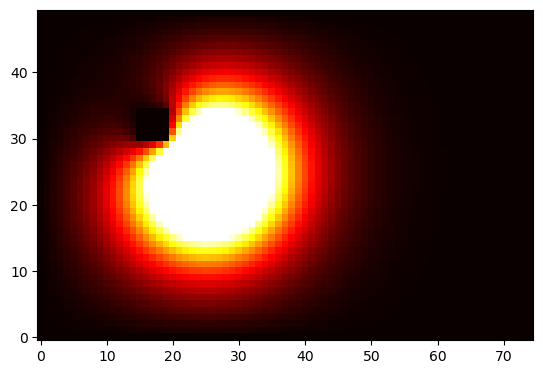

In [52]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time as time
from IPython.display import HTML
import numpy as np

initial_condition = np.zeros((75, 50))
initial_condition[25, 25] = 1000.0  # Point source in the center
# initial_condition[0:1, :] = 100  # Top boundary
# initial_condition[-1, :] = 100.0  # Bottom boundary
# initial_condition[:, 0] = 100.0  # Left boundary
# initial_condition[:, -1] = 100.0  # Right boundary
# initial_condition[25:-1, 0:25] = 20  # Left boundary

vAlpha = np.ones((75, 50)) * 2.5
vAlpha[25, 25] = 0
vAlpha[15:20, 30:35] = 0

start_time = time.time()
test = solve_diffusion_2d_vAlpha(75, 50, 1.0, 1.0, 0.1, 300, vAlpha, initial_condition)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time for solution: {elapsed_time:.2f} seconds")

fig, ax = plt.subplots()
images = []
for i in range(test.shape[0]):
    img = ax.imshow(test[i].T, cmap='hot', vmin=0, vmax=100, animated=True, origin='lower')
    images.append([img])
ani = animation.ArtistAnimation(fig, images, interval=50, blit=True, repeat_delay=1000)

HTML(ani.to_jshtml())

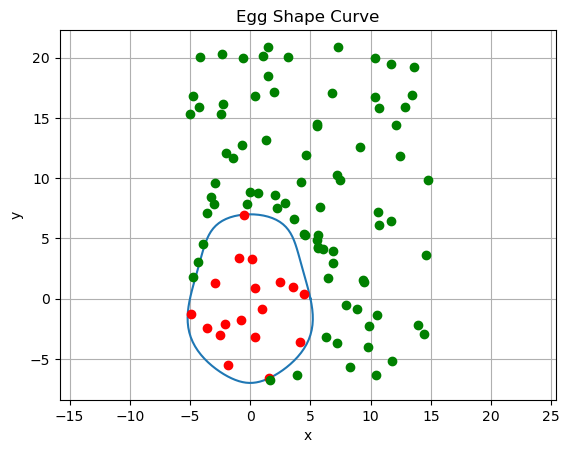

In [152]:
# Egg shape curve
# A parametric equation to generate an egg shape curve
# Reference: Comparison of egg-shape equations using relative curvature measures of nonlinearity, Lian et al., 2024


import numpy as np
import matplotlib.pyplot as plt

def egg_shape(half_width, half_height, t, c1, c2, c3 , x_axis_offset=0, y_axis_offset=0):
    x = (half_width * np.cos(t)) * (1 + c1*np.sin(t) + c2*np.sin(t)**2 + c3*np.sin(t)**3) + x_axis_offset
    y = half_height * np.sin(t) + y_axis_offset
    return x, y

# def point_within_egg_shape(point_x, point_y, half_width, half_height, c1 , c2 , c3 , x_axis_offset=0, y_axis_offset=0):
#     # Compare size of vector from center to point vs vector from center to egg shape boundary at same angle
#     t_test = np.atan2((point_y - y_axis_offset), (point_x - x_axis_offset))
#     egg_x, egg_y = egg_shape(half_width, half_height, t_test, c1, c2, c3, 0, 0)
#     t_egg = np.arctan2(egg_y, egg_x)
#     print(point_x, "\n", point_y, "\n", t_test, "\n", egg_x, "\n", egg_y,  "\n", t_egg)
#     return ((point_x - x_axis_offset)**2 + (point_y - y_axis_offset)**2) <= (egg_x**2 + egg_y**2)

def find_error_at_t(point_x, point_y, half_width, half_height, c1 , c2 , c3 , t, x_axis_offset, y_axis_offset):
    egg_x, egg_y = egg_shape(half_width, half_height, t, c1, c2, c3, 0, 0)
    err = np.atan2(point_y - y_axis_offset, point_x - x_axis_offset) - np.atan2(egg_y, egg_x)
    return err

def point_within_egg_shape(point_x, point_y, half_width, half_height, c1 , c2 , c3 , x_axis_offset, y_axis_offset):
    # Secant method t = theta = atan2(y, x)
    err_n = 1
    count = 0
    t1 = np.atan2((point_y - y_axis_offset), (point_x - x_axis_offset)) - np.pi/4  # Initial guess
    t2 = np.atan2((point_y - y_axis_offset), (point_x - x_axis_offset)) + np.pi/4  # Initial guess
    err1 = find_error_at_t(point_x, point_y, half_width, half_height, c1 , c2 , c3 , t1, x_axis_offset, y_axis_offset)
    err2 = find_error_at_t(point_x, point_y, half_width, half_height, c1 , c2 , c3 , t2, x_axis_offset, y_axis_offset)
    
    while True:
        t_n = t2 - err2 * (t2 - t1) / (err2 - err1)
        err_n = find_error_at_t(point_x, point_y, half_width, half_height, c1 , c2 , c3 , t_n, x_axis_offset, y_axis_offset)
        # print("Iteration ", count, ": t_n = ", t_n, ", err_n = ", err_n)
        if (abs(err_n) < 1e-10 or count >= 100):
            break
        t1, t2 = t2, t_n
        err1, err2 = err2, err_n
        count += 1
        
    # print("Converged in ", count, " iterations with error ", err_n)
    return t_n

t = np.linspace(0, 2*np.pi, 100)
# print(t)
width = 5
height = 7
c1 = -0.3
c2 = 0.1
c3 = 0.5
x_shift = 0 
y_shift = 0 

x, y = egg_shape(width, height, t, c1=c1, c2=c2, c3=c3, x_axis_offset=x_shift, y_axis_offset=y_shift)

x_test = np.random.rand(100) * 4 * width - 1*width
y_test = np.random.rand(100) * 4 * height - 1*height

m = 6
# x_test = np.append(np.linspace(5, -5, m), np.linspace(5, -5, m))
# y_test = np.append(np.ones(m) * 5, np.ones(m) * -5)
# x_test = np.linspace(2.5, 5, m)
# y_test = np.ones(m) * 5

point_in_egg = np.zeros_like(x_test, dtype=bool)
for i in range(len(x_test)):
    t_sol = point_within_egg_shape(x_test[i], y_test[i], width, height, c1=c1, c2=c2, c3=c3, x_axis_offset=x_shift, y_axis_offset=y_shift)
    egg_x, egg_y = egg_shape(width, height, t_sol, c1=c1, c2=c2, c3=c3, x_axis_offset=x_shift, y_axis_offset=y_shift)
    point_in_egg[i] = ((x_test[i] - x_shift)**2 + (y_test[i] - y_shift)**2) <= (egg_x**2 + egg_y**2)
    
plt.plot(x, y)
plt.plot(x_test[np.where(point_in_egg)], y_test[np.where(point_in_egg)], 'ro')  # Plot test points
plt.plot(x_test[np.where(np.invert(point_in_egg))], y_test[np.where(np.invert( point_in_egg))], 'go')  # Plot test points
plt.title('Egg Shape Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid()
plt.show()


## 2D test case

Need exact solution to the discrete model requires a system with a linear solution in time and a quadratic solution in space where the roots meet the requirements $u=0$ when $x=0,L_x$ and $y=0,L_y$, for example:
$$ u(x, y, t) = k.t.x(L_x-x).y(L_y-y) $$
$$     \frac{\delta u}{\delta t} = k.x(L_x-x).y(L_y-y) $$

In [ ]:
# Generate real solution to test equation
import numpy as np
import matplotlib.pyplot as plt

k = 0.02
Lx = 5.0
Ly = 2.0
t_test = 30.0
def real_solution(x, y, t):
    return k * t * x * (Lx - x) * y * (Ly - y)

x = np.linspace(0, Lx, 10)
y = np.linspace(0, Ly, 10)
X, Y = np.meshgrid(x, y)
u_exact = real_solution(X, Y, t_test)

u_test = solve_diffusion_2d(10, 10, (x[1] - x[0]), (y[1] - y[0]), 1, 30, k, np.zeros((10,10)))

# plt.figure()
# plt.imshow(u, cmap='viridis')
# plt.colorbar(label='')
# # plt.title('Error between Numerical and Real Solution at t=30.0')
# plt.show()
